In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import plotly
import plotly.offline as pyo
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import classification_report


In [6]:
titanic=pd.read_csv('/kaggle/input/test-file/tested.csv')

In [7]:
titanic.shape

(418, 12)

In [8]:
titanic.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
58,950,0,3,"Davison, Mr. Thomas Henry",male,NaN,1,0,386525,16.1000,NaN,S
324,1216,1,1,"Kreuchen, Miss. Emilie",female,39.0,0,0,24160,211.3375,NaN,S
196,1088,0,1,"Spedden, Master. Robert Douglas",male,6.0,0,2,16966,134.5000,E34,C
158,1050,0,1,"Borebank, Mr. John James",male,42.0,0,0,110489,26.5500,D22,S
28,920,0,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S
206,1098,1,3,"McGowan, Miss. Katherine",female,35.0,0,0,9232,7.7500,NaN,Q
39,931,0,3,"Hee, Mr. Ling",male,NaN,0,0,1601,56.4958,NaN,S
90,982,1,3,"Dyker, Mrs. Adolf Fredrik (Anna Elisabeth Judi...",female,22.0,1,0,347072,13.9000,NaN,S
247,1139,0,2,"Drew, Mr. James Vivian",male,42.0,1,1,28220,32.5000,NaN,S
51,943,0,2,"Pulbaum, Mr. Franz",male,27.0,0,0,SC/PARIS 2168,15.0333,NaN,C


In [9]:
print(titanic.columns,'\n\n\n\n')
titanic.info()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object') 




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [10]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


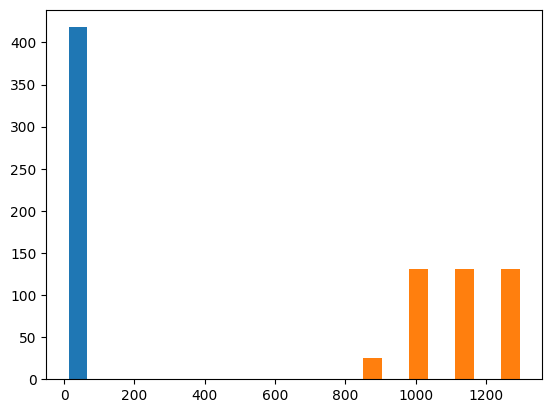

In [12]:
plt.hist(titanic[['Survived','PassengerId']]);

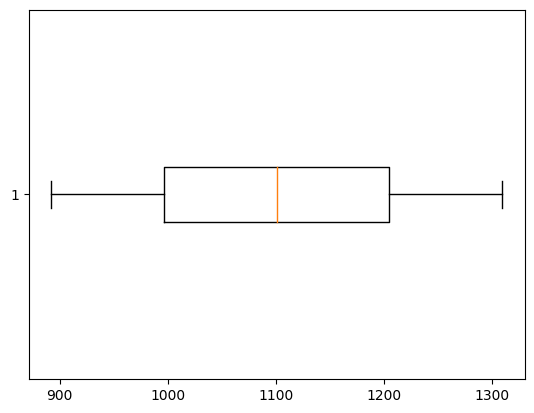

In [13]:
plt.boxplot(titanic['PassengerId'],vert=False);

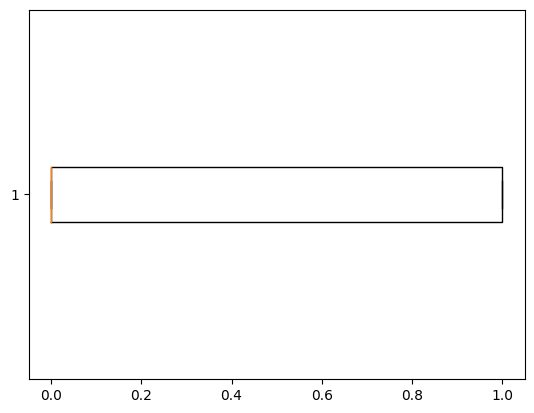

In [14]:
plt.boxplot(titanic['Survived'],vert=False);

In [15]:
titanic['Survived'].describe()

count    418.000000
mean       0.363636
std        0.481622
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [16]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [18]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [19]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [22]:
pclass_counts=titanic.Pclass.value_counts()

fig_pclass_perc=px.pie(titanic,names=pclass_counts.index,values=pclass_counts.values,title=f'Distribution of Pclass', hole=0.2)

fig_pclass_perc.update_traces(textinfo='percent+label')
fig_pclass_perc.update_layout(legend_title_text='Categories:',legend=dict(orientation="h",yanchor="bottom",y=1.02))
fig_pclass_perc.show()

In [24]:
fig_pclass_surv=px.histogram(titanic,x='Sex',barmode='group',color='Survived')

fig_pclass_surv.update_layout(title='Survival according to gender',plot_bgcolor='lightblue')
fig_pclass_surv.show()

In [28]:
fig_pclass_surv=px.histogram(titanic,x='Pclass',barmode='group',color='Survived')
fig_pclass_surv.update_layout(title='Survival according to passenger classes',plot_bgcolor='pink')
fig_pclass_surv.show()